In [32]:
# import packages
import pytesseract
import PIL.Image
import cv2

In [33]:
"""
$ tesseract --help-psm
Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.
"""

"""
OCR Engine modes:
0    Legacy engine only.
1    Neural nets LSTM engine only.
2    Legacy + LSTM engines.
3    Default, based on what is available.
"""

'\nOCR Engine modes:\n0    Legacy engine only.\n1    Neural nets LSTM engine only.\n2    Legacy + LSTM engines.\n3    Default, based on what is available.\n'

In [34]:
# set configs settings
myconfig = r"--psm 1 --oem 3"

text = pytesseract.image_to_string(PIL.Image.open("anime_test.jpg"), config=myconfig)
print(text)

Spring 1999 « 54 episodes
Digimon: Digital
Monsters

Toei Animation

*% 75%

Action Adventure Comedy Fantasy




# plot rectangles around characters


In [35]:
# open the image in opencv2 
img = cv2.imread("anime_test.jpg")
height, width, _ = img.shape


In [36]:

# convert image to boxes
boxes = pytesseract.image_to_boxes(img, config=myconfig)
print(boxes)



S 61 544 73 561 0
p 72 539 82 561 0
r 77 539 97 557 0
i 100 544 103 561 0
n 106 544 116 557 0
g 119 539 130 557 0
1 138 544 143 561 0
9 148 544 160 561 0
9 162 544 174 561 0
9 176 544 188 561 0
« 196 549 203 556 0
5 213 544 224 561 0
4 226 544 240 561 0
e 248 544 259 557 0
p 262 539 272 557 0
i 275 544 278 561 0
s 280 544 289 557 0
o 291 544 302 557 0
d 305 544 316 561 0
e 318 544 329 557 0
s 331 544 340 557 0
D 65 466 102 512 0
i 107 466 116 513 0
g 122 453 151 500 0
i 158 466 167 513 0
m 175 466 222 500 0
o 210 453 240 513 0
n 227 465 258 500 0
: 264 465 309 500 0
D 329 453 343 513 0
i 329 466 366 512 0
g 371 453 414 513 0
i 400 453 424 513 0
t 422 465 455 513 0
a 446 453 470 513 0
l 459 465 502 513 0
M 65 395 107 441 0
o 97 394 129 442 0
n 113 394 144 429 0
s 151 395 179 429 0
t 185 394 210 429 0
e 215 394 236 442 0
r 238 394 268 429 0
s 274 394 323 429 0
T 61 338 78 361 0
o 78 338 93 355 0
e 96 338 110 355 0
i 114 338 118 361 0
A 128 338 148 360 0
n 151 338 165 355 0
i 169 338 173 

as you can see, each text is placed inside a box, in a sense.



| Letter | Top Left (X, Y) | Bottom Right (X, Y) |
|--------|---------------|--------------------|
| S      | 61, 544       | 73, 561            |
| p      | 72, 539       | 82, 561            |
| r      | 77, 539       | 97, 557            |
| i      | 100, 544      | 103, 561           |
| n      | 106, 544      | 116, 557           |
| g      | 119, 539      | 130, 557           |




In [37]:
# drawing over the co-ordinates
for box in boxes.splitlines():
    box = box.split(" ")
    top_left = (int(box[1]), height - int(box[2]))
    bottom_right = (int(box[3])), height - int(box[4])
    color = (0, 255, 0)
    img = cv2.rectangle(img, (int(box[1]), height - int(box[2])), (int(box[3]), height - int(box[4])), (0, 255, 0), 2)

cv2.imshow("img", img)
cv2.waitKey(0)

-1

this is what we got

![Screenshot 2023-07-31 135111.png](<attachment:Screenshot 2023-07-31 135111.png>)

"As you can see, we've highlighted all the important (viewable) text for you. Oh, and those Japanese characters on the flyer? Yeah, we don't need those. Haha, you can ignore those funny symbols, folks! 😄

## recognize words
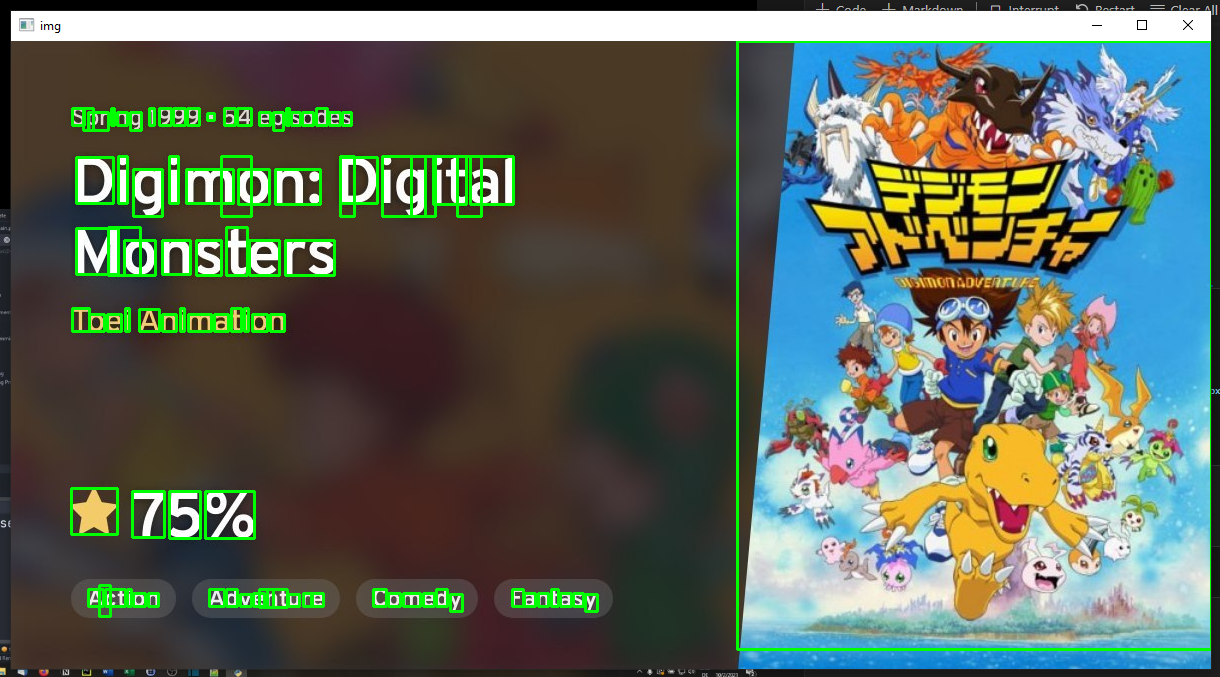

In [38]:
from pytesseract import Output

data = pytesseract.image_to_data(img, config=myconfig, output_type=Output.DICT)

print(data.keys())
print(data['text'])
print(data['conf'])

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])
['', '', '', '', 'Digimon:', 'Digital', '', 'Monsters', '', '', '', 'Toei', 'Ainimation', '', '', '', '*', '75%', '', '', '', 'A:tion', 'Adventure', 'Comedy,', 'Fantasy', '', '', '', '']
[-1, -1, -1, -1, 95, 96, -1, 96, -1, -1, -1, 63, 38, -1, -1, -1, 18, 78, -1, -1, -1, 3, 41, 87, 0, -1, -1, -1, 95]


In [39]:
# printing each word against its confidence level
amount_boxes = len(data['text'])
for i in range(amount_boxes):
    print(f'{data["text"][i]}, {data["conf"][i]} ')

, -1 
, -1 
, -1 
, -1 
Digimon:, 95 
Digital, 96 
, -1 
Monsters, 96 
, -1 
, -1 
, -1 
Toei, 63 
Ainimation, 38 
, -1 
, -1 
, -1 
*, 18 
75%, 78 
, -1 
, -1 
, -1 
A:tion, 3 
Adventure, 41 
Comedy,, 87 
Fantasy, 0 
, -1 
, -1 
, -1 
, 95 


```console
, -1 
, -1 
, -1 
, -1 
Digimon:, 95 
Digital, 96 
, -1 
Monsters, 96 
, -1 
, -1 
, -1 
Toei, 63 
Ainimation, 38 
, -1 
, -1 
, -1 
*, 18 
75%, 78 
, -1 
, -1 
, -1 
A:tion, 3 
Adventure, 41 
Comedy,, 87 
Fantasy, 0 
, -1 
, -1 
, -1 
, 95 
```

as you can see, if we use dicts, the confidence of words drops and mistakes happen. i would preferably go with individual letters.


# conclusion

we will go with individual letters on each image. 
